#  Importing the modules

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn import linear_model, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support

# 1. Load and display the data set

In [ ]:
data=pd.read_csv('car_evaluation.csv')

In [ ]:
data.head()

,buying,maint,doors,persons,lug_boot,safety,acceptability
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [ ]:
data.tail()

,buying,maint,doors,persons,lug_boot,safety,acceptability
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good
1727,low,low,5more,more,big,high,vgood


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0    buying        1728 non-null   object
 1   maint          1728 non-null   object
 2   doors          1728 non-null   object
 3   persons        1728 non-null   object
 4   lug_boot       1728 non-null   object
 5   safety         1728 non-null   object
 6   acceptability  1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [ ]:
data.shape

(1728, 7)

# 2.Check the missing values

In [ ]:
data.isna().sum()

 buying          0
maint            0
doors            0
persons          0
lug_boot         0
safety           0
acceptability    0
dtype: int64

# 3. Encode the columns

In [ ]:
#le_Buy=LabelEncoder()
le = preprocessing.LabelEncoder()
			

In [ ]:
data["Buying"]=le.fit_transform(data[" buying"])
data["Maint"]=le.fit_transform(data["maint"])
data["Doors"]=le.fit_transform(data["doors"])
data["Person"]=le.fit_transform(data["persons"])
data["Lug_bo"]=le.fit_transform(data["lug_boot"])
data["Safety"]=le.fit_transform(data["safety"])
data["Accept"]=le.fit_transform(data["acceptability"])

In [ ]:
data

,buying,maint,doors,persons,lug_boot,safety,acceptability,Buying,Maint,Doors,Person,Lug_bo,Safety,Accept
0,vhigh,vhigh,2,2,small,low,unacc,3,3,0,0,2,1,2
1,vhigh,vhigh,2,2,small,med,unacc,3,3,0,0,2,2,2
2,vhigh,vhigh,2,2,small,high,unacc,3,3,0,0,2,0,2
3,vhigh,vhigh,2,2,med,low,unacc,3,3,0,0,1,1,2
4,vhigh,vhigh,2,2,med,med,unacc,3,3,0,0,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good,1,1,3,2,1,2,1
1724,low,low,5more,more,med,high,vgood,1,1,3,2,1,0,3
1725,low,low,5more,more,big,low,unacc,1,1,3,2,0,1,2
1726,low,low,5more,more,big,med,good,1,1,3,2,0,2,1


# 4. Display X and Y values

In [ ]:
X=data.iloc[:,7:13].values
Y=data.iloc[:,13:14].values

In [ ]:
X

array([[3, 3, 0, 0, 2, 1],
       [3, 3, 0, 0, 2, 2],
       [3, 3, 0, 0, 2, 0],
       ...,
       [1, 1, 3, 2, 0, 1],
       [1, 1, 3, 2, 0, 2],
       [1, 1, 3, 2, 0, 0]])

In [ ]:
X.shape

(1728, 6)

In [ ]:
Y

array([[2],
       [2],
       [2],
       ...,
       [2],
       [1],
       [3]])

In [ ]:
Y.shape

(1728, 1)

# 5. Split the data

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=45)

In [ ]:
x_train.shape

(1382, 6)

In [ ]:
x_test.shape

(346, 6)

In [ ]:
y_train.shape

(1382, 1)

In [ ]:
y_test.shape

(346, 1)

#6. Build the model using random forest

In [ ]:
model=RandomForestClassifier()
model.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

#7. Test the model


In [ ]:
model.score(x_train,y_train)

1.0

In [ ]:
y_predict=model.predict(x_test)

In [ ]:
y_predict

array([2, 0, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 3,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 3, 2, 2, 1, 2, 2, 2, 2, 0, 1,
       3, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 3, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 0, 2, 2, 2, 0, 2, 3, 2, 3, 0,
       2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 1, 2, 2, 2, 2, 0, 2, 2, 2, 2, 1, 2, 0, 3, 2, 2, 2, 1, 0, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 3, 2, 2, 1, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 0, 1, 2, 2, 2, 2, 2, 0, 3, 0, 0, 2, 2, 2,
       2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 3, 0, 2, 1, 0, 2, 2, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 0, 2,
       2, 2, 2, 2, 0, 2, 2, 0, 0, 2, 0, 2, 2, 0, 0, 3, 0, 2, 0, 0, 2, 2,
       0, 2, 0, 0, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 0,
       3, 2, 2, 1, 3, 0, 2, 2, 3, 0, 2, 1, 2, 0, 2,

In [ ]:
model.predict([[1,1,1,3,0,1]])

array([2])

# 8. Check the accuracy score

In [ ]:
accuracy_score(y_test,y_predict)

0.976878612716763

# 9. Display the Confusion Matrix 

In [ ]:
cm=confusion_matrix(y_test,y_predict)
cm

array([[ 70,   2,   1,   1],
       [  2,  13,   0,   0],
       [  2,   0, 241,   0],
       [  0,   0,   0,  14]])

Text(24.0, 0.5, 'Actual')

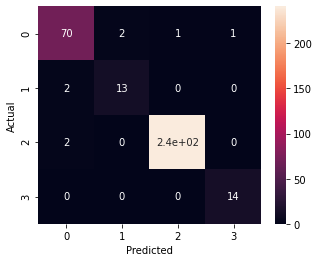

In [ ]:
plt.figure(figsize = (5,4))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

#10. classification report

In [ ]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        74
           1       0.87      0.87      0.87        15
           2       1.00      0.99      0.99       243
           3       0.93      1.00      0.97        14

    accuracy                           0.98       346
   macro avg       0.94      0.95      0.94       346
weighted avg       0.98      0.98      0.98       346



In [ ]:
precision_recall_fscore_support(y_test, y_predict, average='macro')

(0.9354534286352469, 0.951095539984429, 0.9429860717454035, None)

In [ ]:
 precision_recall_fscore_support(y_test, y_predict, average='weighted')

(0.9770593480787911, 0.976878612716763, 0.9769195046121538, None)

In [ ]:
precision_recall_fscore_support(y_test, y_predict)

(array([0.94594595, 0.86666667, 0.99586777, 0.93333333]),
 array([0.94594595, 0.86666667, 0.99176955, 1.        ]),
 array([0.94594595, 0.86666667, 0.99381443, 0.96551724]),
 array([ 74,  15, 243,  14]))